In [8]:
import sys

sys.path.append("..")

import numpy as np
from cbdetect_py import CornerType, Params, boards_from_corners, find_corners
from tqdm.auto import tqdm

from calibration.data.babelcalib.babelcalib import load_babelcalib
from calibration.features.visualization import show_corners


%load_ext autoreload
%autoreload 2

In [18]:
def gen_features():
    datasets = load_babelcalib("../data/BabelCalib/")
    for ds in tqdm(datasets):
        for subds in tqdm([ds.train, ds.test]):
            for entry in subds:
                img = np.array(entry.image)
                # corners = Corner()
                # boards = []
                params = Params()
                params.show_processing = False
                params.corner_type = (
                    CornerType.SaddlePoint
                    if ds.targets[0].type == 0
                    else CornerType.MonkeySaddlePoint
                )

                # img = cv2.imread(image_path, cv2.IMREAD_COLOR)

                corners = find_corners(img, params)
                # plot_corners(img, corners)
                boards = boards_from_corners(img, corners, params)
                # plot_boards(img, corners, boards, params)

                if not corners.p:
                    print("No corners found")
                if not boards:
                    print(params.corner_type)
                    print(ds.targets[0].type)
                    print(len(ds.targets))
                    display(
                        show_corners(img, corners).update_layout(
                            autosize=False, width=800, height=800
                        )
                    )
                    return
                assert corners.p
                assert boards

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

CornerType.SaddlePoint
0
1


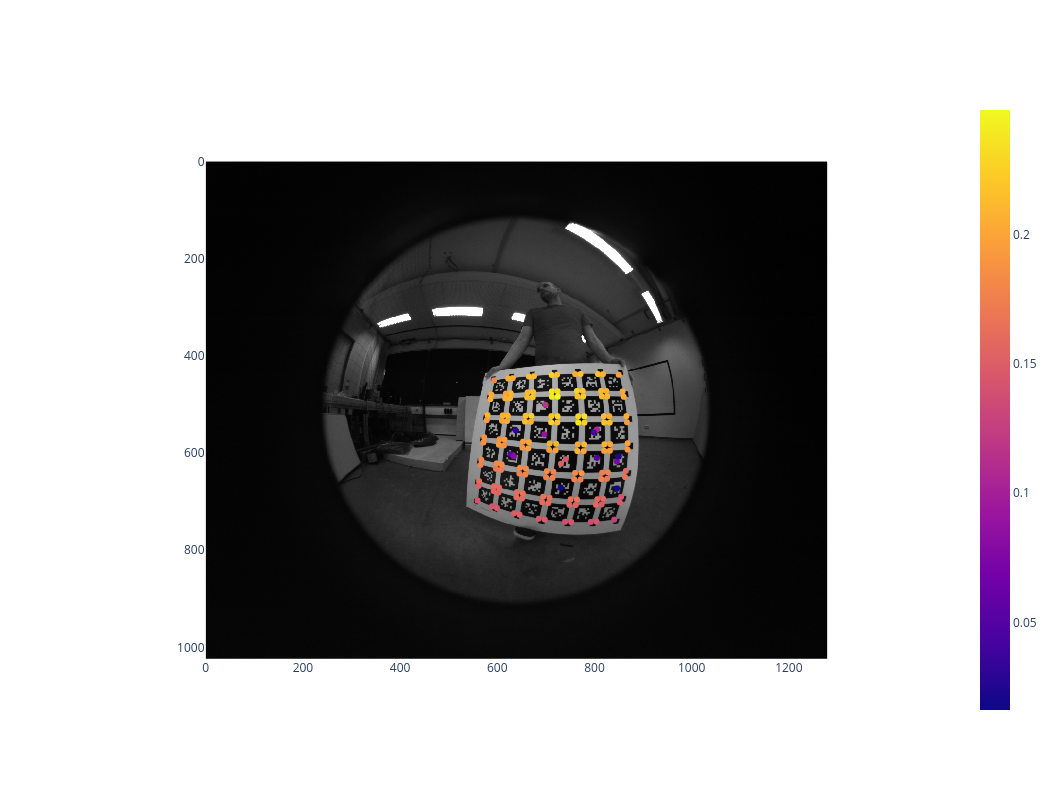

In [19]:
gen_features()